In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

            Time_s  Sensor0_Raw  Sensor1_Raw  DutyCycle  is_from_callback  \
333   1.737355e+09       1.0871       1.0290      116.0             False   
1160  1.737355e+09       1.1226       1.0290       25.0             False   
4975  1.737355e+09       1.1322       1.0290       19.0             False   
2072  1.737355e+09       1.1322       1.0290        3.0             False   
4831  1.737355e+09       1.1322       1.0323       25.0             False   

      Sensor1_Hist_0  Sensor1_Hist_1  Sensor1_Hist_2  Sensor1_Hist_3  \
333           1.0290          1.0290          1.0290          1.0290   
1160          1.0290          1.0290          1.0290          1.0290   
4975          1.0323          1.0323          1.0323          1.0323   
2072          1.0290          1.0290          1.0290          1.0290   
4831          1.0323          1.0323          1.0323          1.0323   

      Sensor1_Hist_4  ...  DutyCycle_Hist_0  DutyCycle_Hist_1  \
333           1.0290  ...             1

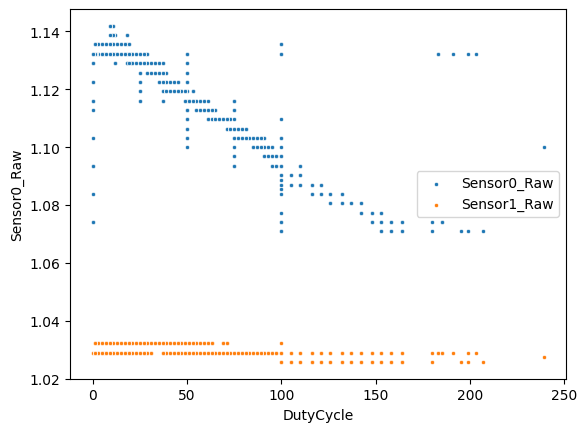

In [8]:
df = pd.read_csv('calibration_data.csv')
print(df.sample(5))
print(df.shape)

sns.scatterplot(x="DutyCycle", y="Sensor0_Raw", data=df,marker='.',label="Sensor0_Raw")
sns.scatterplot(x="DutyCycle", y="Sensor1_Raw", data=df,marker='.',label="Sensor1_Raw")
plt.legend()
plt.show()

In [9]:
X = np.array(df[['DutyCycle', 'Sensor1_Raw']])
y = np.array(df['Sensor0_Raw']) # magnet and permanent magnet

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9402747190985057

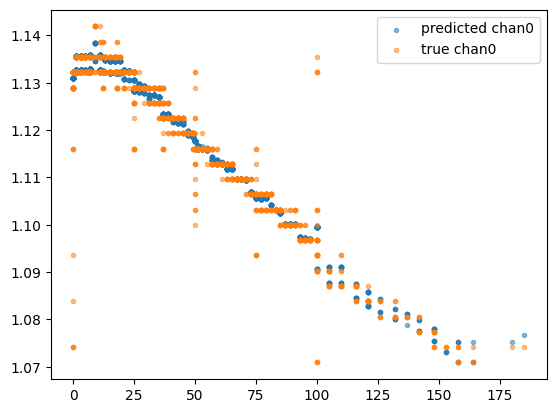

In [10]:
plt.scatter(X_test[:,0], model.predict(X_test), label='predicted chan0', marker='.', alpha=0.5)
plt.scatter(X_test[:,0], y_test, label='true chan0', marker='.',alpha=0.5)
plt.legend()

In [11]:
pred = model.predict(np.array([0,1.6]).reshape(1,-1))[0]

pred

1.1339141514217412

In [12]:
2.4 - pred

1.2660858485782587